## Observations and Insights 

* Within the provided sample data, Capomulin and Ramicane have the most measurements and are the most effective drug regimens in reducing the size of the squamous cell carcinoma (SCC).

* The sample data provided a good mix of female(49.8%) and male mice(50.2%), with the number of male mice only slightly greater than female mice.  

* The realtionship between mouse weight and tumor volume has a very strong positive correlation(0.84) since the value is close to +1. So,if the weight of mouse decreases,tumor volume also decreases, and if the weight of mouse increases,so does the tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Show available styles
print(plt.style.available)
plt.style.use('seaborn-pastel')


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
number_mice = len(combined_df['Mouse ID'].value_counts())
number_mice

249

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset= ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_mice_data =combined_df[combined_df.duplicated(subset= ['Mouse ID','Timepoint'])]
Dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the clean DataFrame.
clean_mice_num = len(clean_df['Mouse ID'].value_counts())
clean_mice_num

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_value =clean_df.groupby('Drug Regimen')

regimen_mean_series  = regimen_value['Tumor Volume (mm3)'].mean()
regimen_median_series = regimen_value['Tumor Volume (mm3)'].median()
regimen_var_series = regimen_value['Tumor Volume (mm3)'].var()
regimen_std_series =regimen_value['Tumor Volume (mm3)'].std()
regimen_sem_series = regimen_value['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = {'Mean': regimen_mean_series, 'Median':regimen_median_series, 
                 'Variance':regimen_var_series, 'Standard Deviation': regimen_std_series,
                 'SEM': regimen_sem_series}

summary_df = pd.concat(summary_stats, axis = 1) 
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_grp = clean_df.groupby('Drug Regimen')
summary_stats = regimen_grp['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

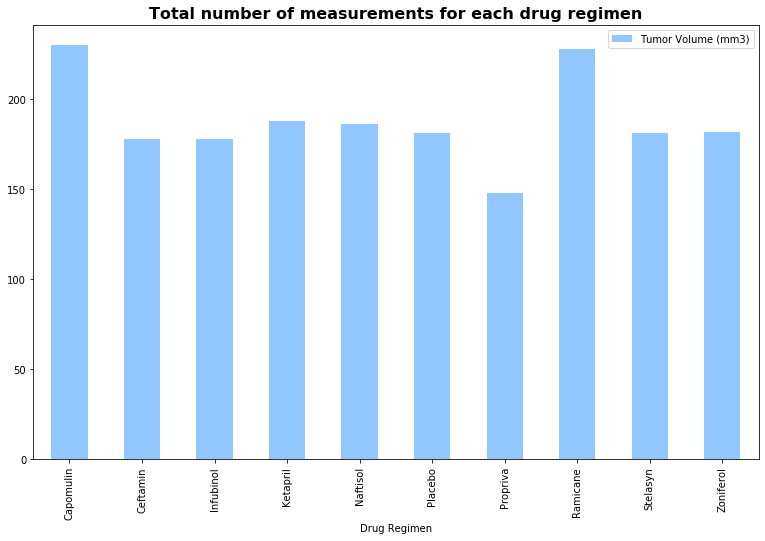

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using panda
drug_regimen = pd.DataFrame(clean_df.groupby(['Drug Regimen']).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
regimen_df = drug_regimen[['Drug Regimen', 'Tumor Volume (mm3)']]

# Set the index to be "Drug Regimen" so they will be used as labels
regimen_df = regimen_df.set_index('Drug Regimen')

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_df.plot(kind = 'bar', figsize=(13,8))

# Set a title for the chart
plt.title('Total number of measurements for each drug regimen',fontweight='bold',fontsize = 16)

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/PandaBar.png')
plt.show()
plt.tight_layout()


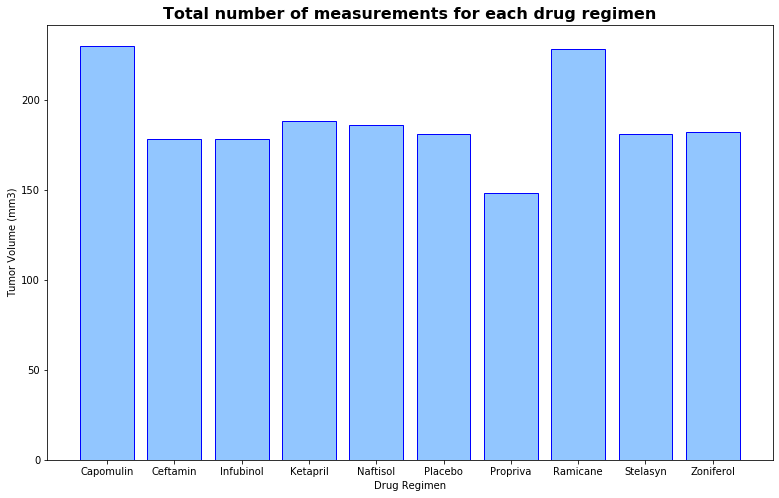

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set axis 
x_axis =summary_df.index.tolist()
y_axis = regimen_value['Tumor Volume (mm3)'].count().tolist()
plt.figure(figsize=(13,8))
plt.bar(x_axis, y_axis, edgecolor = 'b')

# Set a title for the chart
plt.title('Total number of measurements for each drug regimen',fontweight='bold',fontsize = 16)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/PyplotBar.png')
plt.show()
plt.tight_layout()



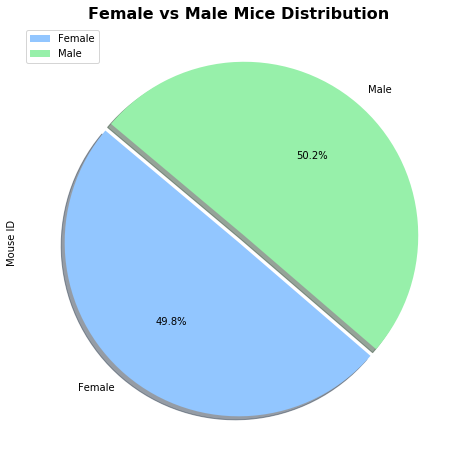

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using panda
gender_df = mouse_metadata.groupby(['Sex']).count().reset_index()

# Filter the DataFrame down only to those columns to chart
gender_mice = gender_df[['Sex','Mouse ID']]

# Set the index to be "Sex" so they will be used as labels
gender_mice = gender_mice.set_index('Sex')

# Use DataFrame.plot() in order to create a pie chart of the data
gender_mice.plot(kind='pie',subplots=True, explode =(0, 0.05), shadow = True, startangle=140,figsize=(12,8), autopct='%1.1f%%')

# Set a title for the chart
plt.title('Female vs Male Mice Distribution',fontweight='bold',fontsize = 16)

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/PandaPies.png')
plt.show()
plt.tight_layout()



Male      125
Female    124
Name: Sex, dtype: int64


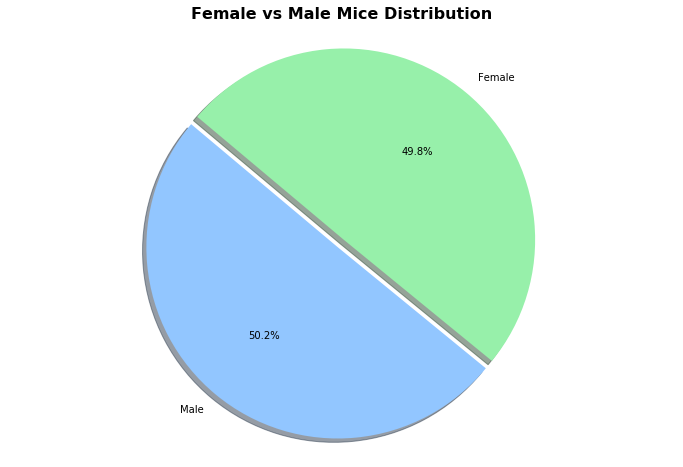

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = mouse_metadata['Sex'].value_counts()
print(mice_sex)

# Create Labels for the sections of the pie
labels = ['Male','Female']
explode = (0, 0.05)

# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(12,8))
plt.pie(mice_sex, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female vs Male Mice Distribution',fontweight='bold',fontsize = 16)
plt.axis('equal')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/PyPies.png')
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
capomulin_last = pd.DataFrame(capomulin_df.groupby('Mouse ID').max()['Timepoint'])


ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
ramicane_last = pd.DataFrame(ramicane_df.groupby('Mouse ID').max()['Timepoint'])

infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
infubinol_last = pd.DataFrame(infubinol_df.groupby('Mouse ID').max()['Timepoint'])

ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]
ceftamin_last = pd.DataFrame(ceftamin_df.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_grp = pd.merge(capomulin_last,clean_df, on= ('Mouse ID','Timepoint'), how= 'left')
ramicane_grp  = pd.merge(ramicane_last,clean_df,  on= ('Mouse ID','Timepoint'), how= 'left')
infubinol_grp = pd.merge(infubinol_last,clean_df, on= ('Mouse ID','Timepoint'), how= 'left')
ceftamin_grp  = pd.merge(ceftamin_last,clean_df,  on= ('Mouse ID','Timepoint'), how= 'left')
capomulin_grp .head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Capomulin --- Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = capomulin_grp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Ramicane --- Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = ramicane_grp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
# Infubinol --- Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = infubinol_grp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# Ceftamin --- Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = ceftamin_grp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


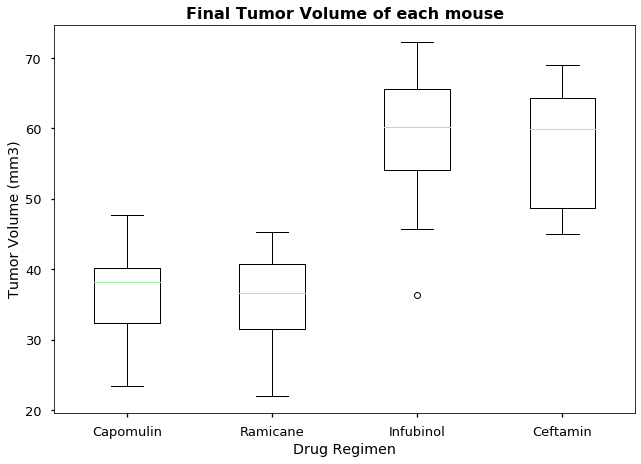

In [19]:
#Create a list to use as labels 
regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_vol = [capomulin_grp['Tumor Volume (mm3)'],ramicane_grp['Tumor Volume (mm3)'],infubinol_grp['Tumor Volume (mm3)'],ceftamin_grp['Tumor Volume (mm3)']]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.style.use('seaborn-talk')
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_vol, labels=regimen)

# Set a title for the chart
ax1.set_title('Final Tumor Volume of each mouse',fontweight='bold', fontsize =16)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/boxplot.png')
plt.show()




## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
# Select mouse Id s185 treated with Capomulin
mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
mouse_capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


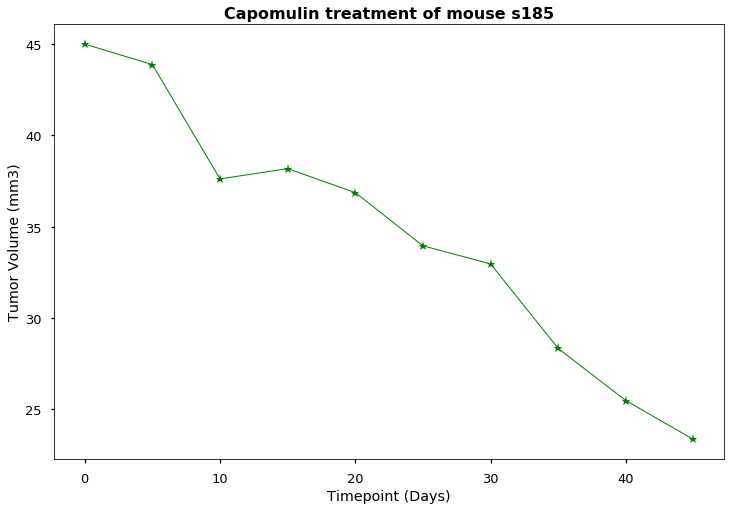

In [22]:
# Set Axis
x_timepoint= mouse_capomulin ['Timepoint']
y_tumor = mouse_capomulin ['Tumor Volume (mm3)']

#Generate a line plot 
plt.figure(figsize=(12,8))
plt.plot(x_timepoint, y_tumor, marker='*',color= 'green', linewidth=1)

# Set a title for the chart
plt.title('Capomulin treatment of mouse s185',fontweight='bold',fontsize = 16)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/lineplot.png')
plt.show()

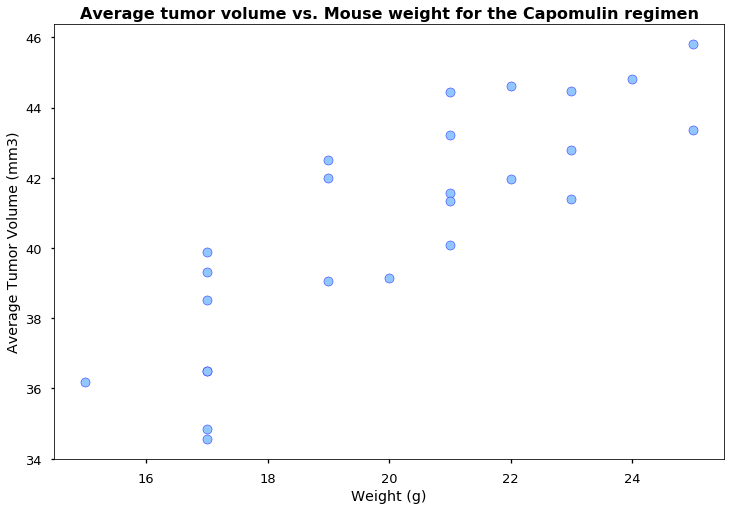

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

x_mouse_weight = capomulin_avg ['Weight (g)']
y_tumor_vol = capomulin_avg ['Tumor Volume (mm3)']

plt.figure(figsize=(12,8))
plt.scatter(x_mouse_weight,y_tumor_vol,edgecolors='b')

# Set a title for the chart
plt.title('Average tumor volume vs. Mouse weight for the Capomulin regimen', fontweight='bold',fontsize = 16)
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/scatterplot.png')
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f'The correlation coefficient between weight and average tumor volume for the Capomulin regimen {round(st.pearsonr(x_mouse_weight,y_tumor_vol)[0],2)}')


The correlation coefficient between weight and average tumor volume for the Capomulin regimen 0.84


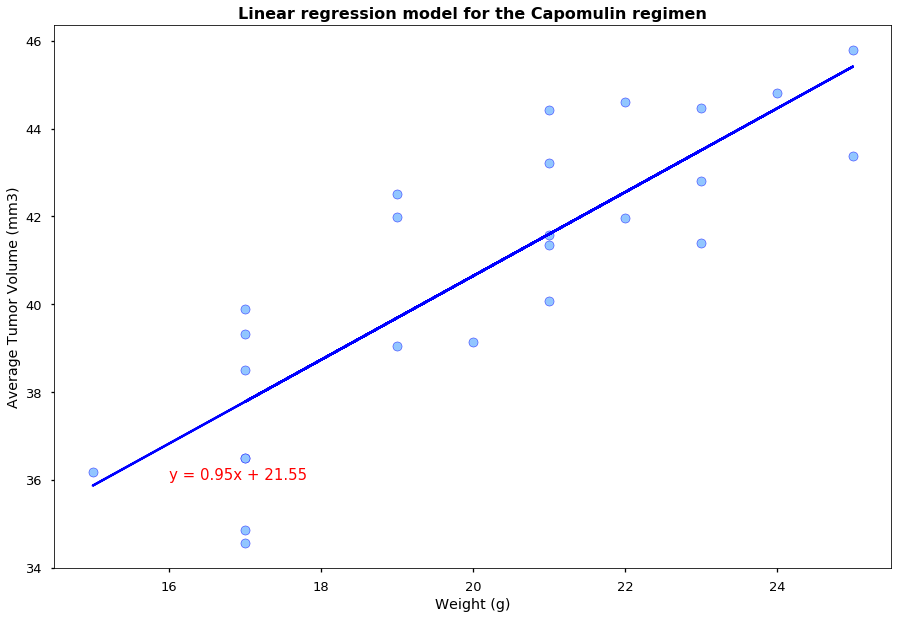

In [31]:
# Add the linear regression equation and line to plot
x_mouse_weight = capomulin_avg ['Weight (g)']
y_tumor_vol = capomulin_avg ['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_mouse_weight , y_tumor_vol)
regress_values = x_mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_mouse_weight,y_tumor_vol, edgecolors='b')
plt.plot(x_mouse_weight,regress_values,'b-')
plt.annotate(line_eq,(16,36),fontsize=15,color='red')

# Set a title for the chart
plt.title('Linear regression model for the Capomulin regimen', fontweight='bold',fontsize = 16)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save an image of our chart and print the final product to the screen
plt.savefig('Analysis/linearregression.png')
plt.show()